# Context
> This is a collection of sales transaction data for NichoaChocolate, based in Magelang, for more than one year. This Magelang-based shop has been selling a wide variety of quality chocolate products since 2018. Their customers come from all major cities in Indonesia and usually make direct purchases as well as through e-commerce.

# Use Case
__________
# Objective Statement:
- Get insight about revenue Every Year & Month.
- Get insight about profit Every Year & Month.
- Get insight about the platforms that customers often use to buy chocolate.
- Get insight about the price of chocolate that is often purchased by customers.
- Find out best top 5 selling chocolate bar.
- Get business insight about top 5 product sold every segment
- Increase Marketing Efficiency about chocolate bar using Segment RFM,and EDA.

# Challenges:
- Data Have Missing at june 2021.
- Data have a lot Outlier at quantity column.
- Choose specific customer data that buys chocolate bar.
- Remove customers who didnt pay for chocolate bar.

# Methodology / Analytic Technique:
- Descriptive analysis.
- Graph analysis.
- Segment Analysis using RFM Analysis. 

# Business Benefit:
- Knowing how to treat customer with specific criteria.
- Knowing sales performance every month so, it can be a reference for future decision making.
- Knowing revenue every Year & Month.
- Knowing profit every Year & Month.
- Knowing about the price of chocolate that is often purchased by customers.
- Knowing best top 5 selling chocolate bar.
- Knowing about the platforms that customers often use to buy chocolate.

# Expected Outcome:
- Find out how much revenue per year and per month.
- Find out sales performance every month.
- Find out revenue every Year & Month.
- Find out profit every Year & Month.
- Find out the platforms that customers often use to buy chocolate.
- Find out the price of chocolate that is often purchased by customers.
- Find out best top 5 selling chocolate bar.
- Know customer segmentation analysis.

# Business Understanding
- How many product sold every month?
- How much revenue every month?
- How much revenue every year?
- How much profit every month?
- How much profit every year?
- What platforms customers often buy chocolate?
- What chocolates are most frequently purchased by customers?
- What is the price of chocolate that customers often buy?

# Data Understanding
- Data of Nichoa Customer with 21 columns and 1616 rows
- This data from 02/01/2021 to 24/02/2022
- Data dictionary : 
 - order no : Order Number
 - order time  : the day and time the customer ordered chocolate
 - brand       : Brand is the name of a specific product.
 - brand comission rate    : commision rate each product
 - brand comission amount  : commission amount for each product
 - item group    : The product group represents the shape and type of product.        
 - item name     : Product Name        
 - item sku      : Stock Keeping Units are differentiator types of goods or services sold.
 - qty           : Quantity of the product      
 - currency      : currency type for payment          
 - price         : product price          
 - add-on price    : additional price of the product        
 - discount percent  : discount percentage of the product     
 - discount amount    : the discount amount of each product   
 - amount             : product price/ product amount
 - tax amount         : tax amount of product 
 - cost perunit       : valuable calculations to make sure their cost is lower than the selling price of a single unit.      
 - total cost         : is the amount of money spent by a company to produce a product in a specific time frame. 
 - profit             : the company's net income, or the amount of money you make from sales in a certain period after deducting COGS and expenses. It can also be said as "net income" or "net income."
 - paid to brand      : the amount to be paid to the brand
 - payment type       : payment type to buy products (the type of payment through the bank is an order via whatsapp) 

# Data preparation
Code Used :
- Python Version: 3.7.6 / Google  Colaboration and Jupyter Notebook
-Packages: Pandas, Numpy, Matplotlib, Seaborn, Sklearn, and Feature Engine 


Load Package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm


import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In Here we upload some package using in RFM modeling

Upload file csv 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


# Data Profiling

Read Dataset

In [ ]:
df_all=pd.read_csv("data.csv")

Show dataset

In [ ]:
df_all.head()

,order no,order time,brand,brand comission rate,brand comission amount,item group,item name,item sku,qty,currency,...,add-on price,discount percent,discount amount,amount,tax amount,cost perunit,total cost,profit,paid to brand,payment type
0,065321010200000075,2021-01-02 15:15:36,Nichoa,0,0,Chocolate Bar,Stress Reliever - 35 gr,SR-1,1,IDR,...,0,0,0,28000,0,19983,19983,8017,28000,BRI Andri Setyowati
1,065321010200000075,2021-01-03 15:15:36,Nichoa,0,0,Chocolate Bar,Mind Relaxing - 35 gr,MR-1,1,IDR,...,0,0,0,28000,0,20902,20902,7098,28000,BRI Andri Setyowati
2,065321010200000075,2021-01-04 15:15:36,Nichoa,0,0,Chocolate Bar,Sleeping Well - 35 gr,SW-1,1,IDR,...,0,0,0,28000,0,22201,22201,5799,28000,BRI Andri Setyowati
3,065321010200000075,2021-01-05 15:15:36,Nichoa,0,0,Chocolate Bar,Immune Booster - 35 gr,IM-1,1,IDR,...,0,0,0,28000,0,23121,23121,4879,28000,BRI Andri Setyowati
4,065321010200000076,2021-01-06 15:15:36,Nichoa,0,0,Chocolate Bar,Immune Booster - 35 gr,IM-1,2,IDR,...,0,0,0,56000,0,23121,46242,9758,56000,BRI Andri Setyowati


# Data Cleansing

Delete the 'Sample Products and Prizes', 'Endorsement', and 'Reject' rows in the **'payment type'** column

In [ ]:
df_all = df_all[df_all['payment type'] != 'Sample Product dan Hadiah']
df_all = df_all[df_all['payment type'] != 'Endorsment']
df_all = df_all[df_all['payment type'] != 'Reject']

Change payment type using bank to platform WA

In [ ]:
df_all['platform'] = df_all['payment type']
df_all['platform'][df_all['platform'] == 'BNI Andri Setyowati'] = 'Whatsapp'
df_all['platform'][df_all['platform'] == 'BRI Andri Setyowati'] = 'Whatsapp'
df_all['platform'][df_all['platform'] == 'Mandiri CV Nutrico Nusantara'] = 'Whatsapp'
df_all['platform'][df_all['platform'] == 'CASH'] = 'Whatsapp'
df_all['platform'][df_all['platform'] == 'Reseller'] = 'Whatsapp'

In [ ]:
df_all['platform'].value_counts()

Whatsapp                764
Pembelian Via Shopee    318
Tokopedia               122
Bukalapak                50
Re-Produksi              11
Evermos                   4
Piutang Konsinyasi        3
Grabfood                  1
Gofood                    1
Name: platform, dtype: int64

Show Shape of Variable df_all


In [ ]:
df_all.shape

(1274, 22)

Take column that used in rfm analysis

*   we need to ensure that data type in 'Order_time' column is datetime so we have function in below  



In [ ]:
# Order date for all column without handling outlier

df_all['order_time'] = pd.to_datetime(df_all['order time'])
df_all['OrderYearMonth'] = df_all['order_time'].map(lambda date: 100*date.year + date.month)
df_all['Date'] = df_all['order_time'].dt.strftime('%Y-%m')
df_all['Year'] = df_all['order_time'].dt.strftime('%Y')
df_all['Month'] = df_all['order_time'].dt.strftime('%m')
df_all['revenue'] = df_all['qty']*df_all['price']
df_all['profit'] = df_all['profit'].str.replace(',','.')
df_all['profit'] = df_all['profit'].astype(float)
df_all['total cost'] = df_all['total cost'].str.replace(',','.')
df_all['total cost'] = df_all['total cost'].astype(float)

Using BoxPlot for Outlier Visualitation

In [ ]:
# fungsi untuk mencari quantile dan outliers
def find_outliers(data):
    
    #Hitung nilai Q1 dan Q3
    Q1 = np.quantile(data , .25)
    Q3 = np.quantile(data, .75)
    
    # Hitung nilai IQR
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR
    
    # Looping dan append outliers
    lower_out = []
    upper_out = []
    
    for i in data:
        if(i < min_IQR):
            lower_out.append(i)
        elif(i > max_IQR):
            upper_out.append(i)
            
    return lower_out, upper_out

So in here we make Function to normalize data from outliers and calculating it


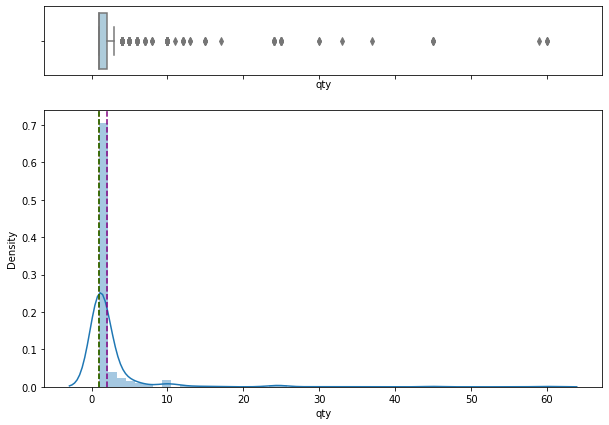

In [ ]:
#Visualisasi Outliers
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios' : (.20, .80)}, figsize=(10,7))
sns.boxplot(df_all['qty'], ax=ax1, palette='Paired')
sns.distplot(df_all['qty'], ax=ax2)
plt.axvline(df_all['qty'].quantile(.25), color='red', ls='--') # quantile 1
plt.axvline(df_all['qty'].quantile(.5), color='green', ls='--') # quantile 2
plt.axvline(df_all['qty'].quantile(.75), color='purple', ls='--')# quantile 3
plt.show()

From the data visualization above, there are lots of outliers, but we do not handle, eliminate, or include these outliers because the data will be biased and not real if segmentation is done.

In [ ]:
# cari outliers dengan fungsi IQR
lower_out = find_outliers(df_all["qty"])[0]
upper_out = find_outliers(df_all["qty"])[1]

In [ ]:
# cek jumlah outliers
outliers = len(lower_out) + len(upper_out)
print("Jumlah Outliers:", outliers)

Jumlah Outliers: 157


In [ ]:
#melihat jumlah quantity berdasarkan order no
df_order = df_all.groupby('order no').qty.sum()
df_order = pd.DataFrame(df_order)
df_order = df_order.reset_index()

In [ ]:
Q1 = np.quantile(df_order['qty'] , .25)
Q3 = np.quantile(df_order['qty'], .75)
    
    # Hitung nilai IQR
IQR = Q3 - Q1
min_IQR = Q1 - 1.5 * IQR
max_IQR = Q3 + 1.5 * IQR

We can see if customers order buy chocolate bar 8 pieces or more, These customers are outliers

Text(0, 0.5, 'qty')

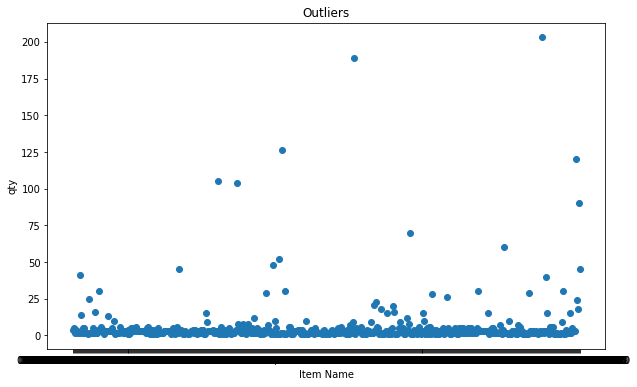

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df_order['order no'],df_order['qty'])
plt.title('Outliers')
plt.xlabel('Item Name')
plt.ylabel('qty') 

In this section, we display total orders by quantity. As can be seen above, there are outliers in the "qty" column. Since the most purchases for each transaction reached 203 items, we can assume that purchases in those transactions were made by resellers.

# EDA

How many product sold every month?

In [ ]:
#Aggregating the Orders by Year and Month

df_agg = df_all.groupby(["Year", "Month"])['order no'].count()
df_agg = pd.DataFrame(df_agg)
df_agg = df_agg.reset_index()
df_agg.head()

,Year,Month,order no
0,2021,01,126
1,2021,02,164
2,2021,03,112
3,2021,04,70
4,2021,05,159


In [ ]:
df_agg['Month'][df_agg['Month']=='01'] ='Jan'
df_agg['Month'][df_agg['Month']=='02'] ='Feb'
df_agg['Month'][df_agg['Month']=='03'] ='Mar'
df_agg['Month'][df_agg['Month']=='04'] ='Apr'
df_agg['Month'][df_agg['Month']=='05'] ='May'
df_agg['Month'][df_agg['Month']=='06'] ='Jun'
df_agg['Month'][df_agg['Month']=='07'] ='Jul'
df_agg['Month'][df_agg['Month']=='08'] ='Aug'
df_agg['Month'][df_agg['Month']=='09'] ='Sep'
df_agg['Month'][df_agg['Month']=='10'] ='Oct'
df_agg['Month'][df_agg['Month']=='11'] ='Nov'
df_agg['Month'][df_agg['Month']=='12'] ='Dec'

In [ ]:
sum(df_agg['order no'])

1274

In [ ]:
df_agg['percent'] = round((df_agg['order no']*100)/sum(df_agg['order no']),2)
df_agg['yearmonth'] = df_agg['Year']+' '+df_agg['Month']
df_agg.head(10)

,Year,Month,order no,percent,yearmonth
0,2021,Jan,126,9.89,2021 Jan
1,2021,Feb,164,12.87,2021 Feb
2,2021,Mar,112,8.79,2021 Mar
3,2021,Apr,70,5.49,2021 Apr
4,2021,May,159,12.48,2021 May
5,2021,Jul,48,3.77,2021 Jul
6,2021,Aug,150,11.77,2021 Aug
7,2021,Sep,46,3.61,2021 Sep
8,2021,Oct,78,6.12,2021 Oct
9,2021,Nov,82,6.44,2021 Nov


In [ ]:
def plot_df(df, x, y, title="", xlabel='Year Month', ylabel='qty', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()

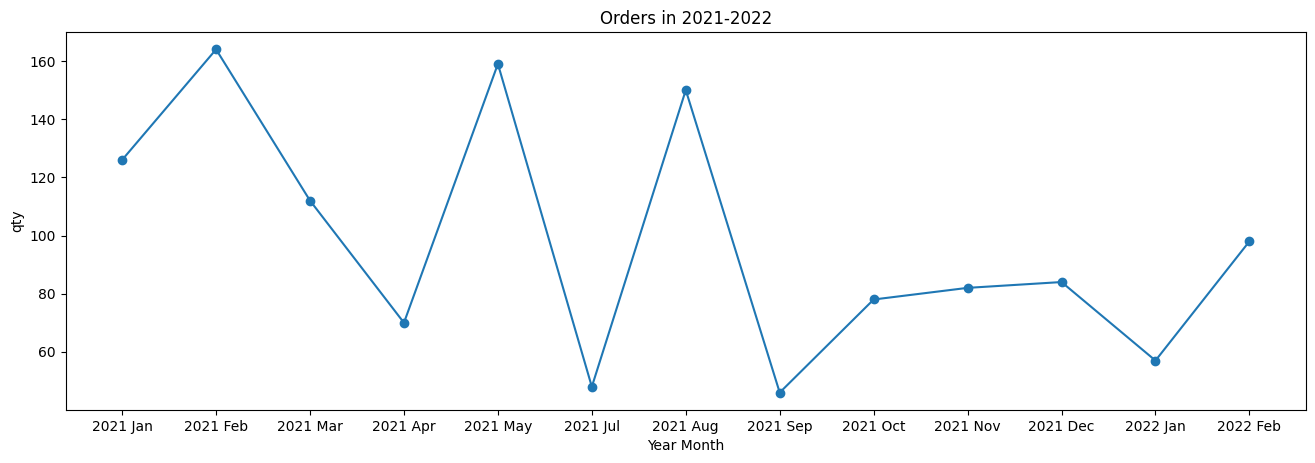

In [ ]:
plot_df(df_agg, x=df_agg.yearmonth, y=df_agg['order no'], title='Orders in 2021-2022')

In [ ]:
df_agg.describe()

,order no,percent
count,13.000000,13.000000
mean,98.000000,7.690769
std,41.111637,3.226602
min,46.000000,3.610000
25%,70.000000,5.490000
50%,84.000000,6.590000
75%,126.000000,9.890000
max,164.000000,12.870000


From the graph above, it can be seen that the highest sales in 2021 were in February with a total percentage sales 12.87%, because in February there is Valentine's Day, so there was a surge in chocolate purchases.Revenue can be explained as the net profit generated by business people in a certain period. 
Average monthly sales with a percentage of 7.69%.
and also the lowest sales on september, only 46 products with a percentage of 3.61%.

sales that tend to fluctuate like the graph above can be influenced by internal and external factors, this needs to be considered because this will have an impact on revenue and profit for the company. external factors such as declining consumer interest and the unstable community economy can trigger sales to fluctuate

therefore we can carry out further analysis

In [ ]:
#Aggregating the revenue by Year and Month

df_rev = df_all.groupby(["Year", "Month"]).revenue.sum()
df_rev = pd.DataFrame(df_rev)
df_rev = df_rev.reset_index()
df_rev.head()

,Year,Month,revenue
0,2021,01,7437750
1,2021,02,15144250
2,2021,03,8363750
3,2021,04,4657750
4,2021,05,10396000


In [ ]:
df_rev['Month'][df_rev['Month']=='01'] ='Jan'
df_rev['Month'][df_rev['Month']=='02'] ='Feb'
df_rev['Month'][df_rev['Month']=='03'] ='Mar'
df_rev['Month'][df_rev['Month']=='04'] ='Apr'
df_rev['Month'][df_rev['Month']=='05'] ='May'
df_rev['Month'][df_rev['Month']=='06'] ='Jun'
df_rev['Month'][df_rev['Month']=='07'] ='Jul'
df_rev['Month'][df_rev['Month']=='08'] ='Aug'
df_rev['Month'][df_rev['Month']=='09'] ='Sep'
df_rev['Month'][df_rev['Month']=='10'] ='Oct'
df_rev['Month'][df_rev['Month']=='11'] ='Nov'
df_rev['Month'][df_rev['Month']=='12'] ='Dec'

In [ ]:
df_rev['percent'] = round((df_rev['revenue']*100)/sum(df_rev['revenue']),2)
df_rev['yearmonth'] = df_rev['Year']+' '+df_rev['Month']
df_rev

,Year,Month,revenue,percent,yearmonth
0,2021,Jan,7437750,6.90,2021 Jan
1,2021,Feb,15144250,14.05,2021 Feb
2,2021,Mar,8363750,7.76,2021 Mar
3,2021,Apr,4657750,4.32,2021 Apr
4,2021,May,10396000,9.64,2021 May
5,2021,Jul,6755750,6.27,2021 Jul
6,2021,Aug,8026000,7.44,2021 Aug
7,2021,Sep,2324000,2.16,2021 Sep
8,2021,Oct,8278000,7.68,2021 Oct
9,2021,Nov,7982000,7.40,2021 Nov


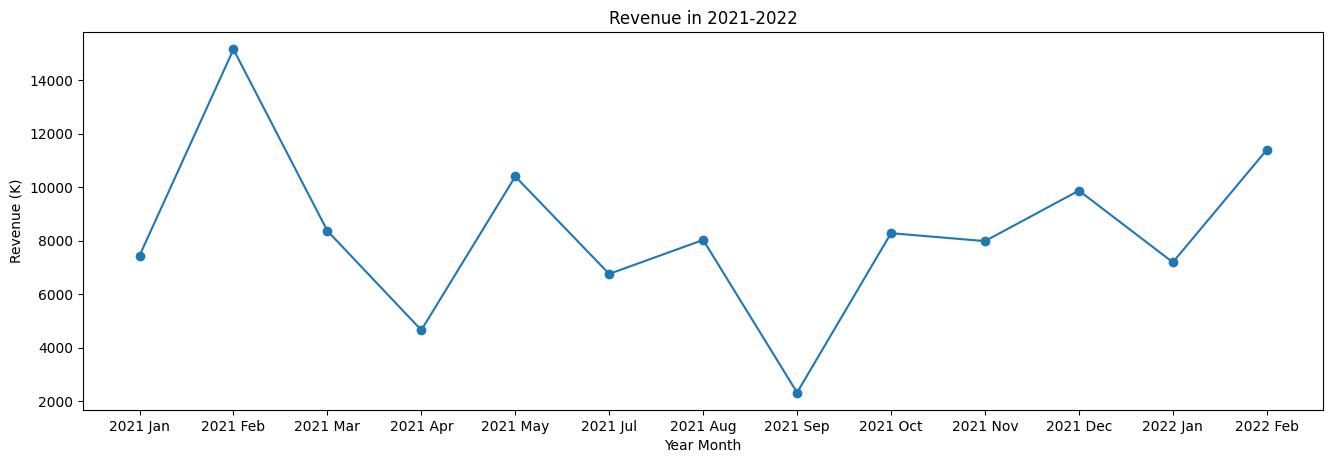

In [ ]:
plot_df(df_rev, x=df_rev.yearmonth, y=df_rev.revenue/1000, title='Revenue in 2021-2022', ylabel='Revenue (K)')

In [ ]:
df_rev.describe()/1000

,revenue,percent
count,0.013000,0.013000
mean,8293.605769,0.007693
std,3119.499966,0.002893
min,2324.000000,0.002160
25%,7190.950000,0.006670
50%,8026.000000,0.007440
75%,9868.600000,0.009150
max,15144.250000,0.014050


From the graph above, we can see that the highest revenue is in February in 2021, where the amount of revenue earned is Rp. 15.144.250 with a percentage of 14.05%. the avarage revenue was Rp. 8.293.606 with precentage 7.69%, and the lowest was Rp. 2.324.000 with precentage 2.16% on september

because in February there is Valentine's Day so there is an increase in purchases which can result in an increase in revenue escpecially in february

The month with the smallest revenue was September, because Nichoa could not explain it in detail, but the information we got was that at that time Nichoa also had a vacancy; this might be one of the reasons for the decrease in revenue this month.

we can see also that revenue fluctuates every month from early 2021 to early 2022. Nicoa must be able to balance the value of the company's revenue and income.

The simple way is to control the company's cash flow. In addition, the company must also be able to record all the company's income and expenses in detail. In addition, marketing activities must also be carried out optimally so as not to exceed the budget provided.

Even though there are times when the company's sales target is not achieved and it is not uncommon to get a small profit, if the capital can be covered, then the company must be wise to find effective ways to increase its sales.

The last thing that must be considered is that the value of revenue will be meaningless if the company is not able to maximize its work process. For that, make sure the amount of company revenue is in accordance with the profit value, and make sure the company's activities can run as efficiently as possible.

In [ ]:
#Show comparison revenue in 2021-2022
df_rev_year = df_rev.groupby('Year').revenue.sum()
df_rev_year = pd.DataFrame(df_rev_year)
df_rev_year = df_rev_year.reset_index()
df_rev_year

,Year,revenue
0,2021,89233850
1,2022,18583025


In [ ]:
revenue2022 = round(df_rev_year['revenue'].iloc[1]*100/df_rev_year['revenue'].iloc[0],2)
print('Jumlah revenue pada tahun 2022 berada pada',revenue2022,'% dari jumlah revenue pada tahun 2021')

Jumlah revenue pada tahun 2022 berada pada 20.83 % dari jumlah revenue pada tahun 2021


Text(0, 0.5, 'Revenue (K)')

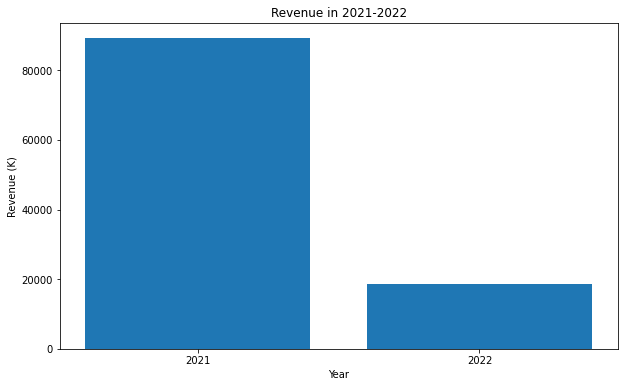

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df_rev_year['Year'],df_rev_year['revenue']/1000)
plt.title('Revenue in 2021-2022')
plt.xlabel('Year')
plt.ylabel('Revenue (K)')

In the two plots above, there is a very significant difference that occurs because the data provided is not complete enough. The data in 2021 has all the complete data from January to December, while in 2022 the data is only for two months, January and February. This is what causes the two plots above to become unbalanced.

(Lack of this data can affect the results of our analysis, especially on sales data for 2022.)

In [ ]:
#Aggregating the total profit by Year and Month
df_profit = df_all.groupby(["Year", "Month"]).profit.sum()
df_profit = pd.DataFrame(df_profit)
df_profit = df_profit.reset_index()

In [ ]:
df_profit['Month'][df_profit['Month']=='01'] ='Jan'
df_profit['Month'][df_profit['Month']=='02'] ='Feb'
df_profit['Month'][df_profit['Month']=='03'] ='Mar'
df_profit['Month'][df_profit['Month']=='04'] ='Apr'
df_profit['Month'][df_profit['Month']=='05'] ='May'
df_profit['Month'][df_profit['Month']=='06'] ='Jun'
df_profit['Month'][df_profit['Month']=='07'] ='Jul'
df_profit['Month'][df_profit['Month']=='08'] ='Aug'
df_profit['Month'][df_profit['Month']=='09'] ='Sep'
df_profit['Month'][df_profit['Month']=='10'] ='Oct'
df_profit['Month'][df_profit['Month']=='11'] ='Nov'
df_profit['Month'][df_profit['Month']=='12'] ='Dec'

In [ ]:
df_profit['percent'] = round((df_profit['profit']*100)/sum(df_profit['profit']),2)
df_profit['yearmonth'] = df_profit['Year']+' '+df_profit['Month']
df_profit

,Year,Month,profit,percent,yearmonth
0,2021,Jan,2084961.00,6.83,2021 Jan
1,2021,Feb,4778277.00,15.66,2021 Feb
2,2021,Mar,2118898.20,6.95,2021 Mar
3,2021,Apr,1374968.43,4.51,2021 Apr
4,2021,May,3538028.39,11.60,2021 May
5,2021,Jul,1898882.53,6.22,2021 Jul
6,2021,Aug,2354480.59,7.72,2021 Aug
7,2021,Sep,643183.48,2.11,2021 Sep
8,2021,Oct,2692525.93,8.83,2021 Oct
9,2021,Nov,2640653.63,8.66,2021 Nov


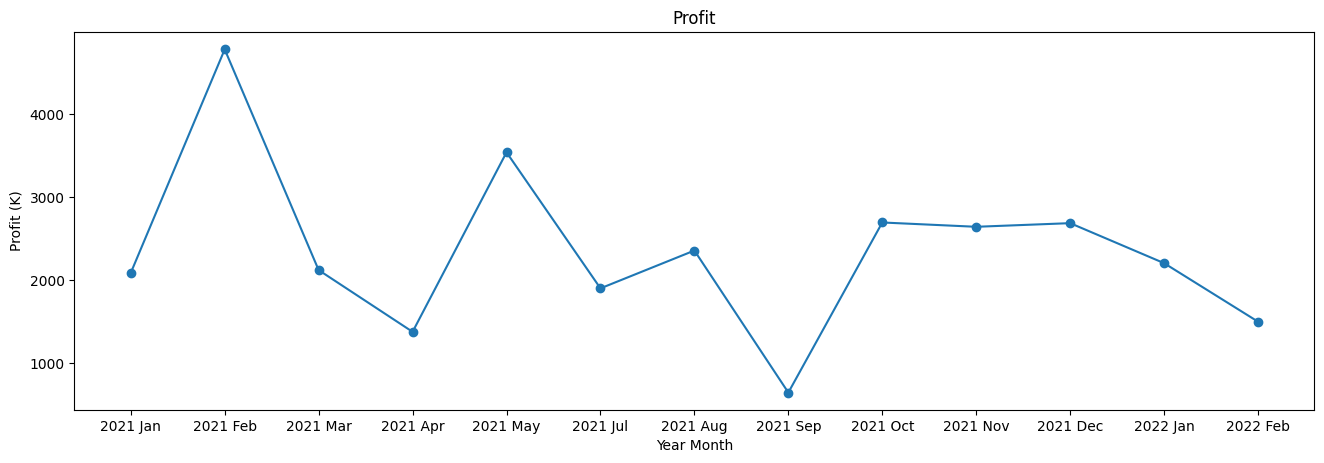

In [ ]:
plot_df(df_profit, x=df_profit.yearmonth, y=df_profit.profit/1000, title='Profit', ylabel='Profit (K)')

In [ ]:
df_profit.describe()/1000

,profit,percent
count,0.013000,0.013000
mean,2346.843155,0.007694
std,1023.127711,0.003353
min,643.183480,0.002110
25%,1898.882530,0.006220
50%,2202.351320,0.007220
75%,2684.460870,0.008800
max,4778.277000,0.015660


From describe and graph above we can see the general information on this data profit. we can see clearly that the average profit each month is Rp. 2,346,843 only 7.69%, the lowest amount of profit is Rp. Rp. 643.183.48 with a total percentage of 2.11%. and the highest amount of profit is Rp. Rp. 4,778,277 with a total percentage reaching 15.66%.

It is very clear that February is the highest, like the previous visualization of revenue, because there is a Valentine's Day celebration in west culture and customers will give chocolate to their loved ones .Due to the influence of western globalization, local customers will also celebrate valentine, this will have an impact on the target market in the country, such as the chocolate snacks that Nicoa sells, which will also be sold in a positive trend.

Apart from that, there is a lot that Nicoa can do to get more profit, not only in February but every month, by always following up on potential buyers. Never give up on contacting potential buyers who have interacted with Nicoa before. According to research by The Marketing Donut, 80% of sales require five follow-ups. Therefore, make sure to always follow up with prospective customers in the right way and at the right time.


In [ ]:
#Show comparison total profit in 2021-2022
df_profit_year = df_profit.groupby('Year').profit.sum()
df_profit_year = pd.DataFrame(df_profit_year)
df_profit_year = df_profit_year.reset_index()

In [ ]:
profit2022 = round(df_profit_year['profit'].iloc[1]*100/df_profit_year['profit'].iloc[0],2)
print('Jumlah profit pada tahun 2022 adalah sebesar',profit2022,'% dari jumlah profit pada tahun 2021')

Jumlah profit pada tahun 2022 adalah sebesar 13.8 % dari jumlah profit pada tahun 2021


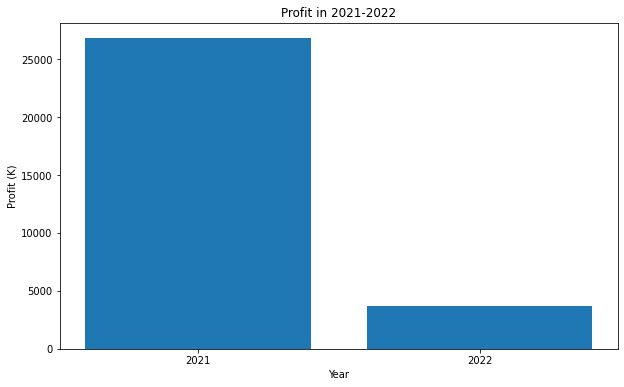

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df_profit_year['Year'],df_profit_year['profit']/1000)
plt.title('Profit in 2021-2022')
plt.xlabel('Year')
plt.ylabel('Profit (K)')
plt.show()

From a comparison of Revenue in 2021 and 2022 it can be seen that total profit in 2021 is much higher, this is because there are only 2 months of data for 2022.

In [ ]:
#Aggregating the total cost by Year and Month
df_cost = df_all.groupby(["Year", "Month"])['total cost'].sum()
df_cost = pd.DataFrame(df_cost)
df_cost = df_cost.reset_index()
df_cost.head()

,Year,Month,total cost
0,2021,01,5352789.00
1,2021,02,10330522.00
2,2021,03,6244851.80
3,2021,04,3282781.64
4,2021,05,6857971.42


In [ ]:
df_cost['Month'][df_cost['Month']=='01'] ='Jan'
df_cost['Month'][df_cost['Month']=='02'] ='Feb'
df_cost['Month'][df_cost['Month']=='03'] ='Mar'
df_cost['Month'][df_cost['Month']=='04'] ='Apr'
df_cost['Month'][df_cost['Month']=='05'] ='May'
df_cost['Month'][df_cost['Month']=='06'] ='Jun'
df_cost['Month'][df_cost['Month']=='07'] ='Jul'
df_cost['Month'][df_cost['Month']=='08'] ='Aug'
df_cost['Month'][df_cost['Month']=='09'] ='Sep'
df_cost['Month'][df_cost['Month']=='10'] ='Oct'
df_cost['Month'][df_cost['Month']=='11'] ='Nov'
df_cost['Month'][df_cost['Month']=='12'] ='Dec'

In [ ]:
df_cost['percent'] = round((df_cost['total cost']*100)/sum(df_cost['total cost']),2)
df_cost['yearmonth'] = df_cost['Year']+' '+df_cost['Month']

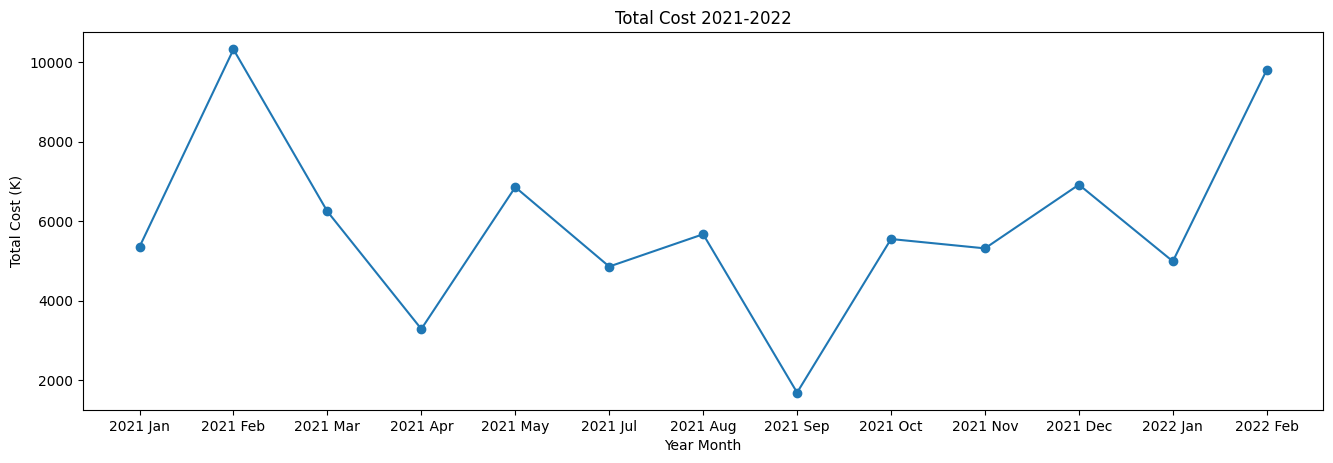

In [ ]:
plot_df(df_cost, x=df_cost.yearmonth, y=df_cost['total cost']/1000, title='Total Cost 2021-2022', ylabel='Total Cost (K)')

In [ ]:
df_item = df_all.groupby('item name').qty.sum()
df_item = pd.DataFrame(df_item)
df_item = df_item.reset_index()
df_item['percent'] = round(df_item['qty']*100/sum(df_item['qty']),2)
df_item_top5 = df_item.sort_values(by=['qty']).tail()
df_item_top5

,item name,qty,percent
14,Sleeping Well - 35 gr,292,8.99
13,Pregnancy - 90 gr,312,9.60
7,Lactation - 35 gr,338,10.40
16,Stress Reliever - 35 gr,343,10.56
5,Immune Booster - 35 gr,349,10.74


Text(0, 0.5, 'qty')

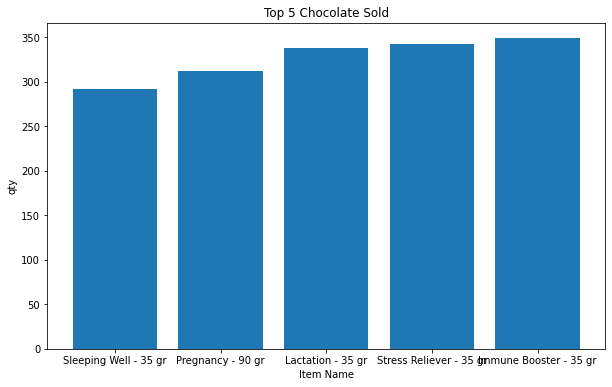

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df_item_top5['item name'],df_item_top5['qty'])
plt.title('Top 5 Chocolate Sold')
plt.xlabel('Item Name')
plt.ylabel('qty')

In [ ]:
df_price = df_all.groupby('price')['order no'].count()
df_price = pd.DataFrame(df_price)
df_price = df_price.reset_index()
df_price['percent'] = round(df_price['order no']*100/sum(df_price['order no']),2)
df_price_top5 = df_price.sort_values(by=['order no']).tail()
df_price_top5

,price,order no,percent
13,32000,33,2.59
23,56000,34,2.67
11,30000,47,3.69
20,46000,402,31.55
9,28000,679,53.30


From the graph above it can be seen that the 5 types of chocolate that are often purchased by customers are Immune Booster with percentage 10.74%, Stress Reliever with percentage 10.56%, Lactation with percentage 10.40%, Pregnancy with percentage 9.60% and Sleeping Well with percentage 8.99%.

Based on our analysis, Immune Booster is the best-selling chocolate bar, and I can conclude that sales for this type of chocolate bar are the best-selling due to the impact of Covid in early 2021, which is quite high; customers prefer healthy and high-quality snacks. The ingridients of ginger and honey in Nichoa Immune Booster Chocolate Bar helps improve and optimize the body's immune system.

A size of 35 grams with a price correlation of Rp. 28,000 with precentage 53.30% is the size that sells best of a product called immune booster. I can conclude that customers will prefer snacks that are cheaper and healthier because of the influence of COVID, which has also shaken the world economy, so consumer purchasing power has decreased.



In [ ]:
df_platform = df_all.groupby('platform')['order no'].count()
df_platform= pd.DataFrame(df_platform)
df_platform = df_platform.reset_index()
df_platform['percent'] = round(df_platform['order no']*100/sum(df_platform['order no']),2)
df_platform_top5 = df_platform.sort_values(by=['order no']).tail(3)
df_platform_top5

,platform,order no,percent
7,Tokopedia,122,9.58
4,Pembelian Via Shopee,318,24.96
8,Whatsapp,764,59.97


Text(0, 0.5, 'Total Customers')

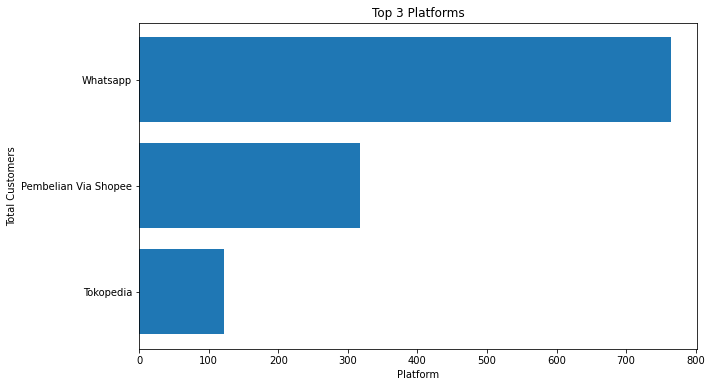

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(df_platform_top5['platform'],df_platform_top5['order no'])
plt.title('Top 3 Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Customers')

as we can see that the most used purchasing platform is Whatsapp with 45.37%, for purchases via shopee with 24.96%, and CASH with 10.99%. then Tokopedia 9.58%, while Bukalapak only 3.92%

Purchasing via Whatasapp means that customers already know and are well acquainted with Nicoa's products. because these customers must have interacted with Nicoa before

# RFM Analysis

Recency Frequency Monetary (RFM)

RFM analysis allows you to segment customers by the frequency and value of purchases and identify those customers who append the most money.

Recency - how long it's been since a customer bought something from us.

Frequency - how often a customer buys from us

Monetary value - the total value of purchases a customer has made.

### Preprocessing

In [ ]:
# Timebound

print(df_all['order time'].min())
print(df_all['order time'].max())

2021-01-02 15:15:36
2022-02-24 16:08:23


In [ ]:
NOW = dt.date(2022,2,24)
df_all['Date'] = pd.DatetimeIndex(df_all.order_time).date

In [ ]:
# Recency

df_recency = df_all.groupby(['order no'],as_index=False)['Date'].max()
df_recency.columns = ['order no','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,order no,Recency
0,065321010200000075,415
1,065321010200000076,414
2,065321010500000077,415
3,065321010600000078,414
4,065321010800000079,412


In [ ]:
# Frequency - Monetary

FM_Table = df_all.groupby('order no').agg({'order no':lambda x:len(x),
                                        'revenue':lambda x:x.sum()})
FM_Table.rename(columns = {'order no' :'Frequency',
                           'revenue':'Monetary'},inplace= True)

In [ ]:
RFM_Table = df_recency.merge(FM_Table,left_on='order no',right_on='order no')
RFM_Table.head()

,order no,Recency,Frequency,Monetary
0,065321010200000075,415,4,112000
1,065321010200000076,414,4,142000
2,065321010500000077,415,2,74000
3,065321010600000078,414,4,95750
4,065321010800000079,412,3,84000


### Modeling Data : RFM Quantiles

- Now we split the metrics into segments using quantiles.
- We will assign a score from 1 to 4 to each Recency, Frequency and Monetary respectively.
- 1 is the highest value, and 4 is the lowest value.
- A final RFM score (Overall Value) is calculated simply by combining individual RFM score numbers.

In [ ]:
# split RFM segment using quantiles

quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 120.25, 0.5: 235.0, 0.75: 346.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'Monetary': {0.25: 56000.0, 0.5: 92000.0, 0.75: 148000.0}}

In [ ]:
segmented_rfm = RFM_Table.copy()

In [ ]:
# function to get quantiles score
# arguments : (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.tail(10)

,order no,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
500,E39422022400000584,0,2,92000,1,3,3
501,FF8021052700000001,273,5,140000,3,1,2
502,OL21070300000031,236,2,138000,3,3,2
503,OL21070300000032,236,3,138000,3,2,2
504,OL21070300000033,236,2,138000,3,3,2
505,OL21071600000040,223,5,4224000,2,1,1
506,OL21120600000072,121,8,900000,2,1,1
507,OL21120800000073,78,3,612000,1,2,1
508,OL22010700000079,55,2,2028600,1,3,1
509,OL22011400000080,86,1,2070000,1,4,1


In [ ]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

In [ ]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile', 'F_quartile', 'M_quartile']].sum(axis=1)

In [ ]:
segmented_rfm.tail(10)

,order no,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
500,E39422022400000584,0,2,92000,1,3,3,133,7
501,FF8021052700000001,273,5,140000,3,1,2,312,6
502,OL21070300000031,236,2,138000,3,3,2,332,8
503,OL21070300000032,236,3,138000,3,2,2,322,7
504,OL21070300000033,236,2,138000,3,3,2,332,8
505,OL21071600000040,223,5,4224000,2,1,1,211,4
506,OL21120600000072,121,8,900000,2,1,1,211,4
507,OL21120800000073,78,3,612000,1,2,1,121,4
508,OL22010700000079,55,2,2028600,1,3,1,131,5
509,OL22011400000080,86,1,2070000,1,4,1,141,6


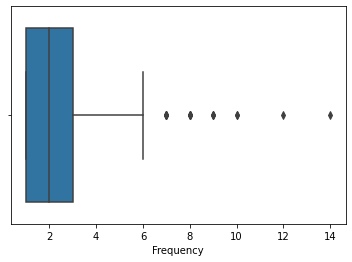

In [ ]:
sns.boxplot(segmented_rfm['Frequency'])

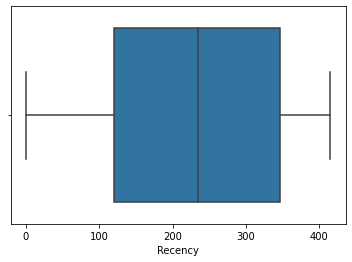

In [ ]:
sns.boxplot(segmented_rfm['Recency'])

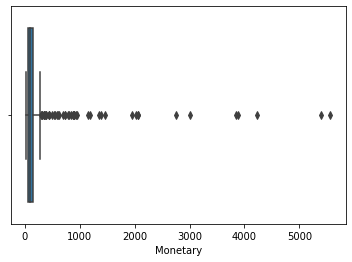

In [ ]:
sns.boxplot(segmented_rfm['Monetary']/1000)

In [ ]:
lower_out = [find_outliers(segmented_rfm[i])[0] for i in segmented_rfm.columns[segmented_rfm.dtypes != object]]
upper_out = [find_outliers(segmented_rfm[i])[1] for i in segmented_rfm.columns[segmented_rfm.dtypes != object]]

outlier = pd.DataFrame({
    "Jumlah Outlier":[len(i) + len(j) for i, j in zip(lower_out, upper_out)],
    "Persentace Outlier":[(len(i) + len(j)) / len(segmented_rfm) * 100 for i,j in zip(lower_out, upper_out)]
}).set_index(segmented_rfm.columns[segmented_rfm.dtypes != object]).sort_values('Jumlah Outlier', ascending=False)
outlier                    

,Jumlah Outlier,Persentace Outlier
Monetary,47,9.215686
Frequency,17,3.333333
Recency,0,0.000000
R_quartile,0,0.000000
F_quartile,0,0.000000
M_quartile,0,0.000000
RFM_Score,0,0.000000


We don't need to handle outliers because in RFM modeling, outliers can be a useful value for companies in getting the right insight for each segment.

- Monetary has 47 outliers with a percentage of 9.2%. We can see this in the visualization of the boxplot and table above. It can be concluded that there are transactions with monetary amounts that are far outside the IQR limit, meaning this can be a good insight for companies due to outliers in the monetary segment. is the money spent in making product purchase transactions that are far above the distribution of data

- Frequency has 17 outliers with a percentage of 3.3%. We can see in the visualization of the boxplot and table above. It can be concluded that there are customers with a number of frequencies far beyond the upper wishkers limit. This means that this can be bad insight for the company because the outliers in the frequency segment are customers. I rarely shop at our store

- Recency Has no outliers there is no insight we can get from recency 

# Labeling

In [ ]:
# Setting up the label for each client and adding the column "Label" to the dataframe

label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):
    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = "Best Customers"
    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = "Lost Cheap Customers"
    elif segmented_rfm['R_quartile'][i] == 3:
        label[i] = "Almost Lost"
    elif segmented_rfm['R_quartile'][i] == 4:
        label[i] = "Lost Customers"
    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = "Loyal Customers"
    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = "Big Spenders"
    else:
        label[i] = "Others"

In [ ]:
# Adding the 'Label' column to our dataframe

segmented_rfm['Label'] = label

In [ ]:
# Count the frequency that a value occurs in a dataframe column for the labels.

segmented_rfm['Label'].value_counts()

Others                  187
Almost Lost             128
Lost Customers          102
Loyal Customers          26
Lost Cheap Customers     25
Big Spenders             24
Best Customers           18
Name: Label, dtype: int64

In [ ]:
percent = pd.DataFrame(round(segmented_rfm.Label.value_counts()*100/segmented_rfm.Label.count(),2))
percent = percent.rename(columns={'Label':'Percent'})
percent.head(7)

,Percent
Others,36.67
Almost Lost,25.10
Lost Customers,20.00
Loyal Customers,5.10
Lost Cheap Customers,4.90
Big Spenders,4.71
Best Customers,3.53


From the label above we can describe each segment

 - Almost Lost & Lost Customers = Haven’t purchased for some time, but purchased frequently and spend the most

- Best Customers = Bought most recently and most often, and spend the most

- Loyal Customers = Buy most frequently

- Big Spenders = Spend the most

- Lost Cheap Customers = Last purchased long ago, purchased few, and spent little



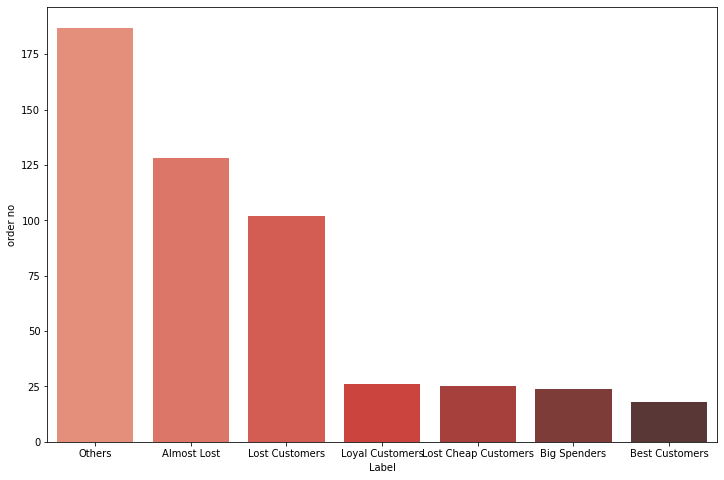

In [ ]:
sq1=segmented_rfm.groupby('Label')['order no'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sq1, x="Label", y="order no", palette = "Reds_d");

# EDA segment

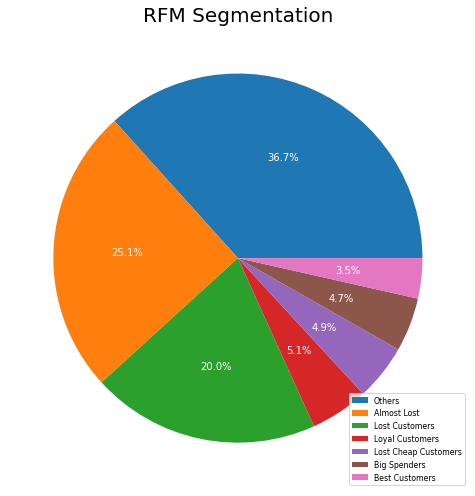

In [ ]:
# visualisasi hasil
plt.figure(figsize=(7,7))
plt.pie(sq1["order no"], 
        autopct = '%.1f%%', 
        textprops = {'fontsize' : 10, 
                     'color' : 'white'})
plt.title("RFM Segmentation", fontsize=20)
plt.legend(sq1["Label"], loc='lower right', prop={'size': 7.7})
plt.tight_layout()
plt.show()

- The number of "Other" is still 36.7%; this segment is more dominant than the whole segment, therefore further analysis is needed.
- The number of "almost lost" or "lost customer" segments is above 20%; to attract these customers, it is necessary to retarget them, such as by making product innovations that suit the needs of this customer.
- The number of "loyal customers" in this segment is 5.1%, which means that the number of healthy customers is still low. Campaign programs or special promotions can be made to increase the number of customers in this category.
- The percentages of "big spenders" and "lost cheap customers" are nearly identical, at 4.9% and 4.7%, respectively.It is better to make an interesting program in order to keep these customers making transactions.
- The number of "best customers" is the segment with the smallest percentage, which can be increased by increasing marketing through social media. in order to attract these customers.

In [ ]:
res = pd.merge(df_all, segmented_rfm, on = "order no")

In [ ]:
other = res[(res['Label'] == 'Others')]
loyal_customers = res[(res['Label'] == 'Loyal Customers')]
big_spenders = res[(res['Label'] == 'Big Spenders')]
almost_lost = res[(res['Label'] == 'Almost Lost')]
lost_customers = res[(res['Label'] == 'Lost Customers')]
best_customers = res[(res['Label'] == 'Best Customers')]
lost_cheap_customers = res[(res['Label'] == 'Lost Cheap Customers')]

## Segment Other

In [ ]:
df_other = other.groupby('item name').qty.sum()
df_other = pd.DataFrame(df_other)
df_other = df_other.reset_index()
df_other['percent'] = round(df_other['qty']*100/sum(df_other['qty']),2)
df_other_top5 = df_other.sort_values(by=['qty']).tail()

Text(0, 0.5, 'qty')

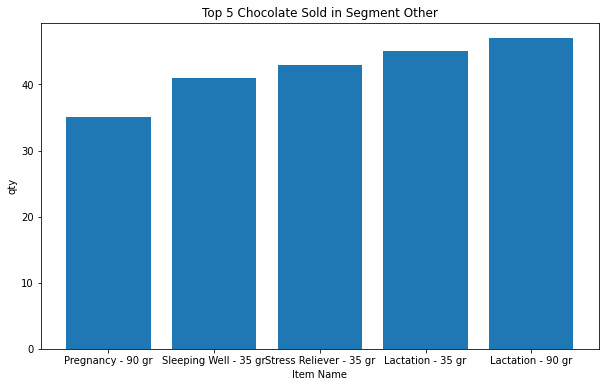

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df_other_top5['item name'],df_other_top5['qty'])
plt.title('Top 5 Chocolate Sold in Segment Other')
plt.xlabel('Item Name')
plt.ylabel('qty')

In [ ]:
df_other_top5

,item name,qty,percent
12,Pregnancy - 90 gr,35,8.58
13,Sleeping Well - 35 gr,41,10.05
15,Stress Reliever - 35 gr,43,10.54
6,Lactation - 35 gr,45,11.03
7,Lactation - 90 gr,47,11.52


In [ ]:
#segmented_rfm.to_csv('data_nichoa.csv')

###Other Segment is a segment which have not been labeled###

other adalah customers yang berbelanja ke toko dalam rentang waktu kurang dari 8 bulan, customers others cenderung cenderung customers yang masih aman, others juga berpotensi menjadi best customers jika customers pada segment ini sering berbelanja.

The Choclate Bar type product with the name "Lactation -- 90 gr." with precentage 11.52% is the best-selling product in the Other Segment, so we can assume that most customers in the Other Segment buy this product.
are mothers who are breastfeeding.


Each product has different ingredients; the best-selling products in this segment contain ingredients that are healthy and safe for customers who are breastfeeding. This product innovation also makes it clear that in this segment, the average buyer is female and breastfeeding.

for the largest purchase size is a product with a size of 90 gr chocolate, meaning that buyers in this segment are quite exclusive because if we look at the price for a 90 gr size, it is Rp. 46,000. Customers in this segment are dominated by established buyers in the sense that they have a fairly stable economy.



## Segment Loyal Customers

In [ ]:
df_loyal_customers = loyal_customers.groupby('item name').qty.sum()
df_loyal_customers = pd.DataFrame(df_loyal_customers)
df_loyal_customers = df_loyal_customers.reset_index()
df_loyal_customers['percent'] = round(df_loyal_customers['qty']*100/sum(df_loyal_customers['qty']),2)
df_loyal_customers_top5 = df_loyal_customers.sort_values(by=['qty']).tail()

Text(0, 0.5, 'qty')

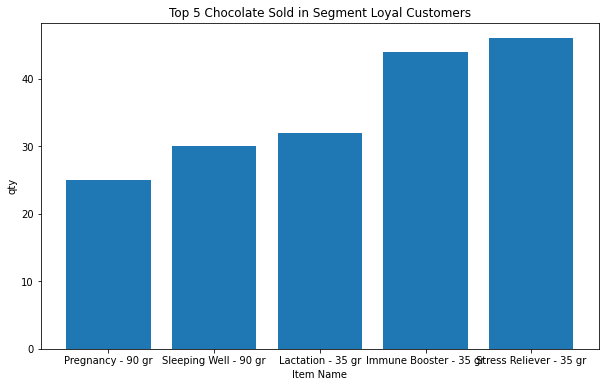

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df_loyal_customers_top5['item name'],df_loyal_customers_top5['qty'])
plt.title('Top 5 Chocolate Sold in Segment Loyal Customers')
plt.xlabel('Item Name')
plt.ylabel('qty')

In [ ]:
df_loyal_customers_top5

,item name,qty,percent
10,Pregnancy - 90 gr,25,9.69
12,Sleeping Well - 90 gr,30,11.63
5,Lactation - 35 gr,32,12.40
3,Immune Booster - 35 gr,44,17.05
13,Stress Reliever - 35 gr,46,17.83


###Loyal Customers are customers Buy most frequently ###


In this segment, the chocolate bar-type product with the name "Stress Reliever-35gr" with precentage 17.05% is the best-selling product. We can assume that customers in this segment are more likely to choose healthy snacks because the ingredients in chocolate can help give you energy and make you relax.

Even though the percentage of the loyal customer segment is quite small only 5.1%, this segment is the one with the most frequent product purchases in stores, so Nicoa should pay attention to this segment.

I assume that in this segment, most of them are customers who already know the quality and taste of the product and tend to give positive reviews about it.

Customer loyalty is built on a foundation of consistently high-quality products, outstanding customer service, positive customer experiences, and ultimately, customer satisfaction, which Nicoa can sustain because this impacts a customer's readiness to make repeat purchases and consistently prefer one nichoa offering over a competitor's.
.

## Big Spenders

In [ ]:
df_big_spenders = big_spenders.groupby('item name').qty.sum()
df_big_spenders = pd.DataFrame(df_big_spenders)
df_big_spenders = df_big_spenders.reset_index()
df_big_spenders['percent'] = round(df_big_spenders['qty']*100/sum(df_big_spenders['qty']),2)
df_big_spenders_top5 = df_big_spenders.sort_values(by=['qty']).tail()

Text(0, 0.5, 'qty')

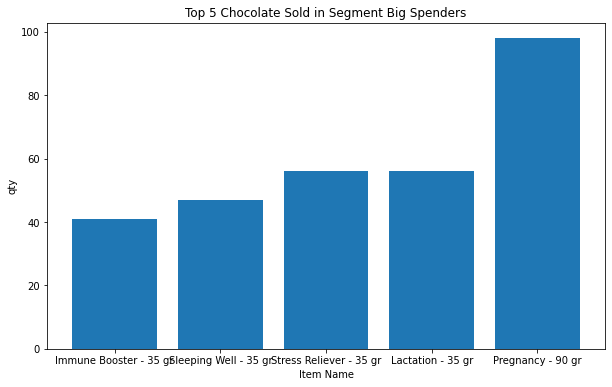

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df_big_spenders_top5['item name'],df_big_spenders_top5['qty'])
plt.title('Top 5 Chocolate Sold in Segment Big Spenders')
plt.xlabel('Item Name')
plt.ylabel('qty')

In [ ]:
df_big_spenders_top5

,item name,qty,percent
3,Immune Booster - 35 gr,41,9.26
11,Sleeping Well - 35 gr,47,10.61
13,Stress Reliever - 35 gr,56,12.64
5,Lactation - 35 gr,56,12.64
10,Pregnancy - 90 gr,98,22.12


###Big Spenders are Customers Spend the most### 


In the Big Spender segment, for this chocolate bar type product, the most purchased are "lactation-35gr" with presentage 12.64% and "pregnancy-90gr" with precentage 22.12%, Customers in this segment may tend to be dominated by pregnant and lactating mothers. 

For this segment, the target market has been identified, namely women and mothers. For product innovation, Nicoa has been successful in creating high-quality chocolate that is safe for pregnant women to consume. So, for this segment, it is clear who the customers are.

This is the most exclusive segment and the one that must be considered the most, because in this segment, customers with very well-established economies must be kept keep transactions to always purchase products, This can be seen by buying 90-gr chocolate at a price of Rp. 46,000, you can be sure that customers in this segment are more concerned with taste and quality than price


Because the percentage is quite small, only 4.7%, Nicoa can do various things to increase or retain customers in this segment, including maintaining product quality, continuing to follow up with prospective buyers who have interacted with Nicoa before, and promoting it through recommendations or testimonials to buyers who have purchased Nicoa products, or you can also say "
Word-of-mouth marketing"



## Segment Almost Lost

In [ ]:
df_almost_lost = almost_lost.groupby('item name').qty.sum()
df_almost_lost = pd.DataFrame(df_almost_lost)
df_almost_lost = df_almost_lost.reset_index()
df_almost_lost['percent'] = round(df_almost_lost['qty']*100/sum(df_almost_lost['qty']),2)
df_almost_lost_top5 = df_almost_lost.sort_values(by=['qty']).tail()

Text(0, 0.5, 'qty')

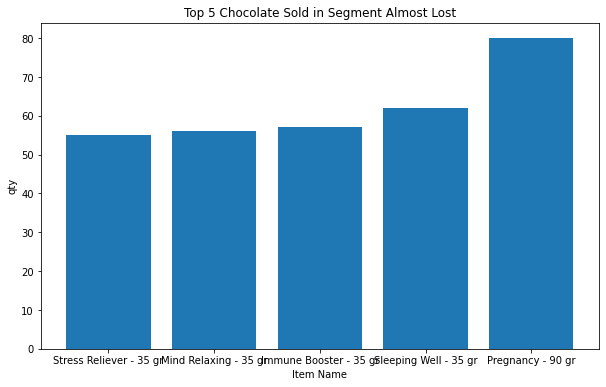

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df_almost_lost_top5['item name'],df_almost_lost_top5['qty'])
plt.title('Top 5 Chocolate Sold in Segment Almost Lost')
plt.xlabel('Item Name')
plt.ylabel('qty')

In [ ]:
df_almost_lost_top5

,item name,qty,percent
15,Stress Reliever - 35 gr,55,8.69
9,Mind Relaxing - 35 gr,56,8.85
4,Immune Booster - 35 gr,57,9.00
13,Sleeping Well - 35 gr,62,9.79
12,Pregnancy - 90 gr,80,12.64



### Almost Lost are Customers Haven’t purchased for some time ###

Customers in this segment are at risk of churn or losing customers; the percentage is quite high, reaching 25.1% of the total data; this segment also needs to be considered by Nichoa because these customers are prone to leaving, making it necessary to carry out the right strategy for these customers.

Just like the previous segment, the customers were dominated by women, including pregnant women.

The way to be able to retarget these consumers is to broaden the target market and determine the target market according to the target, which is usually distinguished by gender, age, demographics, location, and so on.

However, to increase the company's revenue, there is nothing wrong with trying to find new sales targets. Reach them by leveraging existing technology. For example, using social media like TikTok to reach younger sales targets or members of generation Z

## Segment Lost Customers

In [ ]:
df_lost_customers = lost_customers.groupby('item name').qty.sum()
df_lost_customers = pd.DataFrame(df_lost_customers)
df_lost_customers = df_lost_customers.reset_index()
df_lost_customers['percent'] = round(df_lost_customers['qty']*100/sum(df_lost_customers['qty']),2)
df_lost_customers_top5 = df_lost_customers.sort_values(by=['qty']).tail()

Text(0, 0.5, 'qty')

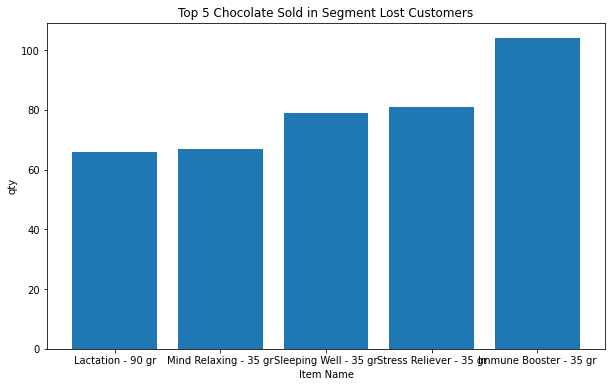

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df_lost_customers_top5['item name'],df_lost_customers_top5['qty'])
plt.title('Top 5 Chocolate Sold in Segment Lost Customers')
plt.xlabel('Item Name')
plt.ylabel('qty')

In [ ]:
df_lost_customers_top5

,item name,qty,percent
8,Lactation - 90 gr,66,9.08
10,Mind Relaxing - 35 gr,67,9.22
14,Sleeping Well - 35 gr,79,10.87
16,Stress Reliever - 35 gr,81,11.14
5,Immune Booster - 35 gr,104,14.31


### Lost Customers are Customers Haven’t purchased for some time ###


In the lost customers segment, the chocolate bar product with the name "Immune Booster 35" with precentage 14.31% is the best-selling product. We assume that customers in this segment tend to choose healthy snacks. The ingridients of ginger and honey in Nichoa Immune Booster Chocolate Bar helps improve and optimize the body's immune system.

Just like the almost lost segment, customers in this segment are at risk of churn or leaving with precentage 20.0%. The most common way to win back lost customers is to give them special offers; starting from discounts, cashback, free gifts and many more. While this option can be expensive, it's always one to consider.

besides that, nichoa can ask for feedback, it is always important for all companies to continue to improve their business. nichoa can send an email to your old customers asking for their feedback about your services or products they have used in the past.

After Nichoa has collected their feedback, it is important to show them that their feedback is valuable for your business by following up on the things mentioned in the feedback.
Once done, Nicoa can send them a thank-you email with a message that Nicoa has taken extra steps to address their feedback.
By doing this, you can rebuild customer trust and make them feel valued.


## Segment Best Customers

In [ ]:
df_best_customers = best_customers.groupby('item name').qty.sum()
df_best_customers = pd.DataFrame(df_best_customers)
df_best_customers = df_best_customers.reset_index()
df_best_customers['percent'] = round(df_best_customers['qty']*100/sum(df_best_customers['qty']),2)
df_best_customers_top5 = df_best_customers.sort_values(by=['qty']).tail()

Text(0, 0.5, 'qty')

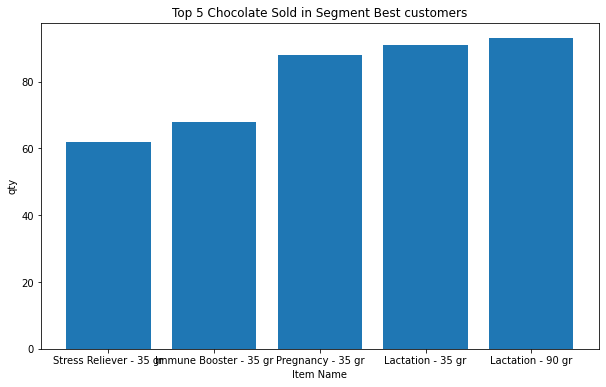

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df_best_customers_top5['item name'],df_best_customers_top5['qty'])
plt.title('Top 5 Chocolate Sold in Segment Best customers')
plt.xlabel('Item Name')
plt.ylabel('qty')

In [ ]:
df_best_customers_top5

,item name,qty,percent
14,Stress Reliever - 35 gr,62,8.21
4,Immune Booster - 35 gr,68,9.01
10,Pregnancy - 35 gr,88,11.66
6,Lactation - 35 gr,91,12.05
7,Lactation - 90 gr,93,12.32


### Best Customers are Customers whow Bought most recently and most often, and spend the most ### 



In this segment, the best-selling type of chocolate bar is `Lactation-90gr` with percentage 12.32%, just like the loyal customers and other segment. These customers are dominated by mothers who are breastfeeding.

best customers is the segment with the smallest percentage, which is only 3.5% of the total data, this segment is the most important segment of all segments, because customers in this segment often shop, recent transactions, and spend a lot of money on our products.

increasing customers in this segment is something that must be done by nichoa, we analyze that customers in this segment are dominated by women and mothers, we suggest not to be fixated on that target market, nichoa has the potential to be able to expand its marketing network through there are many ways such as advertising products so that potential customers know what products Nichoa sells. Advertisements can be done digitally or using old school methods.
Providing attractive promos can be in the form of discounts or free products for purchasing products with a minimum amount.
Improving product quality in order to provide more value for consumers. and in a quite extreme way in my opinion, Nichoa was able to lower product prices.




## Segment Lost Cheap Customers

In [ ]:
df_lost_cheap_customers = lost_cheap_customers.groupby('item name').qty.sum()
df_lost_cheap_customers = pd.DataFrame(df_lost_cheap_customers)
df_lost_cheap_customers = df_lost_cheap_customers.reset_index()
df_lost_cheap_customers['percent'] = round(df_lost_cheap_customers['qty']*100/sum(df_lost_cheap_customers['qty']),2)
df_lost_cheap_customers_top5 = df_lost_cheap_customers.sort_values(by=['qty']).tail()

Text(0, 0.5, 'qty')

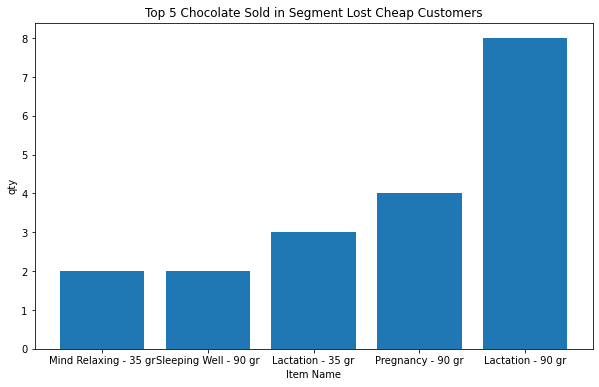

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df_lost_cheap_customers_top5['item name'],df_lost_cheap_customers_top5['qty'])
plt.title('Top 5 Chocolate Sold in Segment Lost Cheap Customers')
plt.xlabel('Item Name')
plt.ylabel('qty')

In [ ]:
df_lost_cheap_customers_top5

,item name,qty,percent
4,Mind Relaxing - 35 gr,2,8.0
8,Sleeping Well - 90 gr,2,8.0
2,Lactation - 35 gr,3,12.0
7,Pregnancy - 90 gr,4,16.0
3,Lactation - 90 gr,8,32.0


In [ ]:
df = res.groupby('order no').qty.sum()
df = pd.DataFrame(df)
df = df.reset_index()
df = res[res['order no'] == df['order no'][df['qty'] == df['qty'].max()].tolist()[0]]
df['profit'].value_counts()
df.head()

,order no,order time,brand,brand comission rate,brand comission amount,item group,item name,item sku,qty,currency,...,revenue,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,Label
1202,E39422020800000526,2022-02-08 11:58:14,Nichoa,0,0,Chocolate Bar,Lactation - 35 gr,Lactation-1,59,IDR,...,1239000,16,4,5397000,1,1,1,111,3,Best Customers
1203,E39422020800000526,2022-02-08 11:58:14,Nichoa,0,0,Chocolate Bar,Pregnancy - 90 gr,Pregnancy-0,24,IDR,...,828000,16,4,5397000,1,1,1,111,3,Best Customers
1204,E39422020800000526,2022-02-08 11:58:14,Nichoa,0,0,Chocolate Bar,Lactation - 90 gr,Lactation-0,60,IDR,...,2070000,16,4,5397000,1,1,1,111,3,Best Customers
1205,E39422020800000526,2022-02-08 11:58:14,Nichoa,0,0,Chocolate Bar,Pregnancy - 35 gr,Pregnancy-1,60,IDR,...,1260000,16,4,5397000,1,1,1,111,3,Best Customers


###Lost Cheap Customers are Customers who Last purchased long ago, purchased few, and spent little###


Chocolate Bar purchases in this segment are not too 
significant, but the best-selling ones are chocolate bars with the type of `Lactation - 35gr` with percentage 32.0%.

this segment is the segment with the least number of purchases, to increase this segment the method is the same as the previous method, this segment tends to no longer shop, rarely buy products, and the money spent is also very little, to maintain or increase customers in the segment this is nichoa's choice, but the strategy we provide is not much different from the strategy we have provided in the previous segment,

Our suggestion is for Nicoa to focus more on several segments with a small percentage, but have the potential to provide large revenue or profits for the company, once again this is optional

# Result

- There was an increase in purchases in February 2021 which resulted in an increase in revenue and profit earned for that month, in our opinion this happened due to Valentine's Day in that month.

- The number of "Other" is still 36.7%; this segment is more dominant than the whole segment, therefore further analysis is needed.The Choclate Bar type product with the name "Lactation -- 90 gr." with precentage 11.52% is the best-selling product in the Other Segment, so we can assume that most customers in the Other Segment buy this product.
are mothers who are breastfeeding.

- The number of "almost lost" or "lost customer" segments is above 20%; to attract these customers, it is necessary to retarget them, such as by making product innovations that suit the needs of this customer.Customers in this segment are at risk of churn or losing customers; the percentage is quite high, reaching 25.1% of the total data; this segment also needs to be considered by Nichoa because these customers are prone to leaving, making it necessary to carry out the right strategy for these customers.
Just like the previous segment, the customers were dominated by women, including pregnant women.

- The number of "loyal customers" in this segment is 5.1%, which means that the number of healthy customers is still low. Campaign programs or special promotions can be made to increase the number of customers in this category.


- The percentages of "big spenders" and "lost cheap customers" are nearly identical, at 4.9% and 4.7%, respectively.It is better to make an interesting program in order to keep these customers making transactions.




- The number of "best customers" is the segment with the smallest percentage, which can be increased by increasing marketing through social media. in order to attract these customers.





# Recommendation


- sales, revenue, profits tend to fluctuate. The biggest thing that influences this is internal and external factors, Nicoa can pay more attention to external factors; consumers based on economic strata, consumer purchasing power, and also the demographics of consumers, for internal factors, Nicoa can pay more attention to sales cash flow, marketing activities, and also detailed financial records
- Nichoa have to further improve marketing strategy and hold promos more often, especially in February, because in that month the number of chocolate purchases will increase a lot.
- Nichoa have to further improve marketing strategy by utilizing social media such as Instagram, TikTok and others, especially in months where sales are low like September.
- Recommendations for "Best Customers" segment: focus on retaining customers so that customers do not switch to other brands by holding promos more often, and also give additional points for this customers.
- Recommendations for "Big Spenders" segment: focus on offering other products, especially products that match customer interests or products that are often sought after. Can also offer products with a high price range.
- Recommendations for "Loyal Customers" segment: The company must optimize the campaign for this customer segment in order to maintain their loyalty. It can also give additional points for customer loyalty.
- Recommendations for "Almost Lost segment": Just like the previous segment, the customers were dominated by women, including pregnant women. The way to be able to retarget these consumers is to broaden the target market and determine the target market according to the target, which is usually distinguished by gender, age, demographics, location, and so on.
- Recommendations for Lost Customers segment:
- Recommendations for Lost Cheap Customers segment:


In [ ]:
df2 = res.groupby('order no').qty.sum()
df2 = pd.DataFrame(df2)
df2 = df2.reset_index()